In [1]:
# import modules
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

# Import DataFrames

In [2]:
# get raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [3]:
# get lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(5)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
4662,TAG 40:5+NH4 (-FA 19:1 (NH4)),TAG,40,5
878,PE O-32:0 (LPE p),PE O,32,0
3021,SGalCer 41:0;4 (LCB 18:0;2-H2O),SGalCer,41,0
3286,"SGalCer 34:2;3 (LCB 18:1;2-2H2O,LCB 18:0;3-3H2O)",SGalCer,34,2
4514,DAG 29:3+NH4 (-FA 17:2 (NH4)),DAG,29,3


In [4]:
# get experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.sample(5)

,Exp,Mutation
0,CAS9-A,CAS9
8,CAVIN_A,CAVIN
40,WT_B,WT
12,CERS2_mg-A,CERS2_mg
39,WT_A.1,WT


# Principal Components Analysis (Transposed)

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [43]:
# drop the blank columns and transpose dataframe
samples = df["Sample Name"]
df_dropped = df[["WT_A","CAS9-A","CAS9-A.1","CAS9-B","CAS9-B.1","WT_A.1","WT_B","WT_B.1", "Flot2-A", "Flot2-A.1", "Flot2-B", "Flot2-B.1"]]

df_dropped = df_dropped.T
exps = df_dropped.index

x = df_dropped.values

# for each column, standardize the values
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

((12, 6278), np.float64(3.700743415417188e-17), np.float64(1.0))

In [44]:
# create dataframe with standardized values
df_standardized = pd.DataFrame(x, columns=samples)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
WT_A,1.005596,-0.841346,1.721097,1.257887,0.245907,-0.323960,-0.446946,-0.793676,-0.784297,-0.301511,...,-0.444446,0.0,0.0,0.0,-0.446729,1.344082,0.0,1.031267,1.421007,1.823258
CAS9-A,-0.451728,1.004624,-0.981161,0.721188,1.200394,0.235693,2.319487,0.384074,0.209278,-0.301511,...,-0.444446,0.0,0.0,0.0,-0.446729,-0.780694,0.0,-0.781439,-0.806100,-0.699684
CAS9-A.1,-1.011131,0.986561,-1.589072,0.251577,0.489122,0.289911,-0.446946,-0.793676,-0.784297,-0.301511,...,-0.444446,0.0,0.0,0.0,-0.446729,-0.780694,0.0,-0.781439,-0.806100,-0.699684
CAS9-B,-1.430684,0.755015,-0.110186,-0.285121,1.788524,2.539666,-0.446946,0.130845,0.867774,-0.301511,...,-0.444446,0.0,0.0,0.0,-0.446729,-0.780694,0.0,-0.781439,-0.806100,-0.699684
CAS9-B.1,-1.267525,2.010143,-1.638989,0.050315,1.135552,0.196743,2.149971,-0.793676,0.975624,3.316625,...,-0.444446,0.0,0.0,0.0,-0.446729,-0.780694,0.0,-0.781439,-0.806100,-0.699684
WT_A.1,2.138440,-1.051043,1.443464,0.922450,-0.115513,0.788229,-0.446946,-0.793676,-0.784297,-0.301511,...,-0.444446,0.0,0.0,0.0,-0.446729,2.020147,0.0,1.449583,1.683396,-0.699684
WT_B,0.457303,-1.315571,0.406027,0.519926,0.238598,-0.336432,-0.446946,-0.270231,-0.784297,-0.301511,...,-0.444446,0.0,0.0,0.0,2.119584,1.183114,0.0,1.031267,1.027424,1.255351
WT_B.1,-0.102100,0.187517,0.002113,-0.218034,-0.313737,0.321271,-0.446946,-0.793676,-0.784297,-0.301511,...,-0.444446,0.0,0.0,0.0,2.347701,0.571436,0.0,1.867900,1.203416,1.333683
Flot2-A,-0.364838,-0.918291,-0.159603,-2.901525,-0.996275,-1.036686,-0.446946,1.561294,1.855832,-0.301511,...,2.494337,0.0,0.0,0.0,-0.446729,0.346081,0.0,0.090054,0.307454,1.185179
Flot2-A.1,-0.011248,-0.611514,-0.077098,-0.285121,-1.467511,-1.058080,-0.446946,2.244846,1.581570,-0.301511,...,1.950118,0.0,0.0,0.0,-0.446729,-0.780694,0.0,-0.781439,-0.806100,-0.699684


In [45]:
# do PCA
from sklearn.decomposition import PCA
pca_lipids = PCA(n_components=10)
principal_components = pca_lipids.fit_transform(x)

In [46]:
# create df with pca values

# create list of columns
pcs = []
for i in range(1,11):
    pcs.append('principal component ' + str(i))
# print(pcs)

# create df
df_pca = pd.DataFrame(principal_components, columns=pcs)
df_pca["Exp"] = exps
df_pca = df_pca.merge(df_exps, on='Exp')
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,Exp,Mutation
0,-22.053253,-37.409034,-2.869719,4.477154,-1.211396,-0.570030,-12.772422,2.005664,-38.666230,-12.893806,WT_A,WT
1,-22.573704,42.534705,-15.943120,-22.364236,6.222651,36.602491,-26.364302,-0.276628,3.547514,-0.085514,CAS9-A,CAS9
2,-22.028107,35.951048,-14.864752,-32.078456,-23.069948,-35.885785,9.236524,-1.956936,-2.826626,-0.986578,CAS9-A.1,CAS9
3,-23.519977,41.794204,2.937453,39.531371,9.676778,-8.593445,-0.225302,-31.603178,-1.135547,1.262097,CAS9-B,CAS9
4,-16.780976,32.846184,7.529184,19.958664,8.943266,2.535128,19.291938,42.141021,-0.174596,-1.947981,CAS9-B.1,CAS9
5,-25.345963,-41.597118,-9.840698,14.103488,-6.084458,-18.240421,-30.453203,11.514165,25.142698,1.366769,WT_A.1,WT
6,-19.577249,-35.325257,-15.356998,-7.466654,7.614795,13.921641,30.729374,-13.246130,16.718422,-20.343422,WT_B,WT
7,-18.873885,-31.966976,-10.832911,-5.262178,5.899946,8.139978,15.868060,-2.001180,-7.222169,33.952638,WT_B.1,WT
8,60.034917,-0.209520,0.732387,-14.873815,45.898010,-18.520658,-6.132125,-0.038216,-0.252386,-1.185643,Flot2-A,Flot2
9,81.561161,3.299594,-32.939172,16.406127,-28.072418,9.533543,1.947964,0.747821,-1.364416,0.422896,Flot2-A.1,Flot2


Explained variation per principal component: [0.25068667 0.19852146 0.10926677 0.07601685 0.071545   0.06621146
 0.06069166 0.05477337 0.04379925 0.03465162]


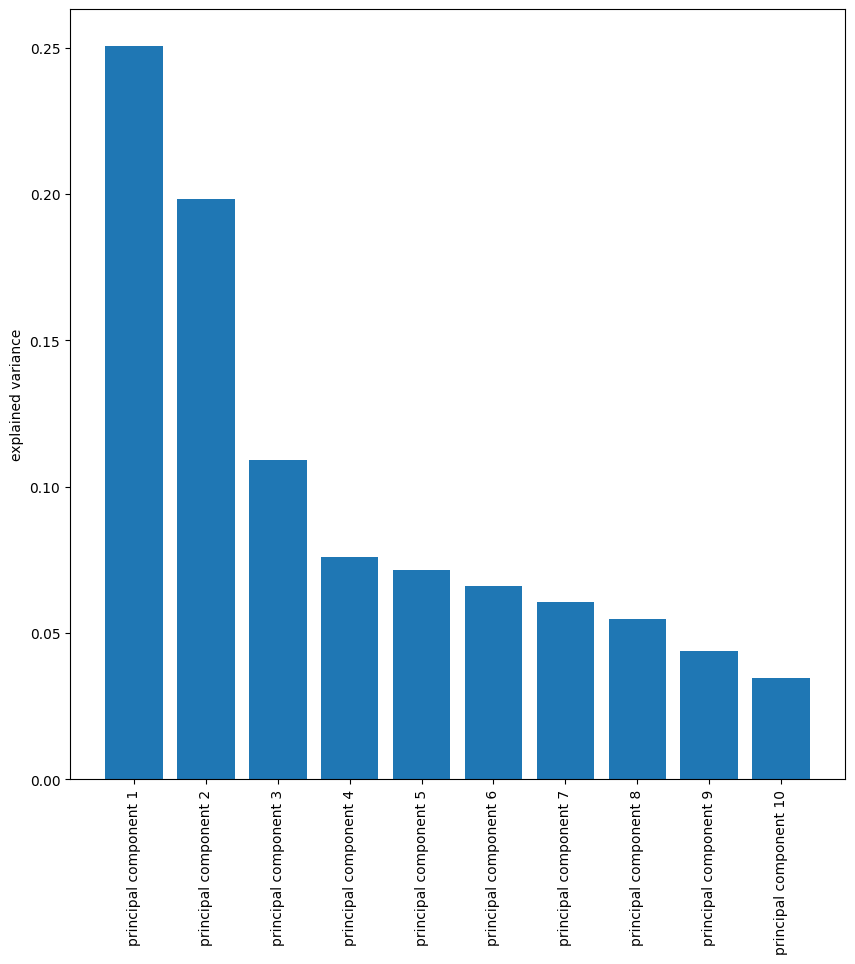

In [47]:
# find explained variance
explained_variance = pca_lipids.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

plt.figure(figsize=(10,10))
plt.bar(
    x=pcs,
    height=explained_variance
)
plt.ylabel('explained variance')
plt.xticks(rotation=90)
plt.show()

In [48]:
# which features contribute to the components. it has shape (n_components, n_features)
components_df = pd.DataFrame(pca_lipids.components_, columns=samples, index=pcs)
components_df

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
principal component 1,-0.000270,-0.009481,0.000217,-0.018857,-0.021692,-0.018038,-0.007374,0.024502,0.018126,-0.004222,...,0.025852,0.0,0.0,0.0,-0.007162,-0.007940,0.0,-0.009019,-0.008289,-0.001331
principal component 2,-0.026518,0.025558,-0.026467,-0.005943,0.016169,0.010385,0.017824,0.006303,0.015488,0.010436,...,0.000640,0.0,0.0,0.0,-0.015806,-0.027120,0.0,-0.027182,-0.027760,-0.020096
principal component 3,0.004357,0.004243,0.007817,-0.004449,-0.010441,-0.006822,-0.003917,-0.008327,-0.011764,0.004346,...,-0.012241,-0.0,-0.0,-0.0,-0.011118,-0.012388,-0.0,-0.013252,-0.012764,-0.009240
principal component 4,-0.002019,0.002537,0.012807,0.004611,0.012524,0.024831,-0.002302,0.002680,0.017833,0.016561,...,-0.001015,-0.0,-0.0,-0.0,-0.007767,0.002403,-0.0,-0.000197,0.000976,-0.009641
principal component 5,-0.011143,-0.003692,-0.002619,-0.032357,0.011690,0.004670,0.009854,0.005794,0.022581,0.007885,...,0.016488,-0.0,-0.0,-0.0,0.008779,0.013410,-0.0,0.013077,0.014397,0.026887
principal component 6,0.001615,0.003655,0.000933,0.015358,0.002283,-0.010655,0.028395,0.009149,0.000076,0.002415,...,-0.008320,-0.0,-0.0,-0.0,0.015396,-0.009169,-0.0,-0.002914,-0.006693,0.001954
principal component 7,-0.024547,0.008929,-0.021129,-0.008628,0.000459,-0.005803,-0.006560,-0.007046,-0.001205,0.020050,...,-0.003837,-0.0,-0.0,-0.0,0.035390,-0.010784,-0.0,0.000375,-0.006566,0.013949
principal component 8,0.002328,0.020903,-0.016704,0.005053,-0.002248,-0.018953,0.034589,-0.014179,0.007431,0.048530,...,0.000534,0.0,0.0,0.0,-0.012600,0.002466,0.0,-0.000007,0.001521,-0.007950
principal component 9,0.012845,-0.007842,-0.007126,-0.004414,-0.003831,0.008454,0.003726,0.006060,-0.001016,-0.000251,...,-0.001596,-0.0,-0.0,-0.0,0.009045,0.004397,-0.0,-0.001212,-0.003050,-0.031854
principal component 10,-0.003973,0.013729,-0.009400,-0.013051,-0.008463,0.020641,-0.002664,0.002963,-0.001790,-0.003546,...,-0.001244,0.0,0.0,0.0,0.021468,-0.009532,0.0,0.015958,0.002161,-0.002767


# Graph PCA (Transposed)

In [49]:
import altair as alt

In [50]:
# chart principal components
click = alt.selection_point(fields=['Mutation'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'Mutation:N', alt.value('lightgray')),
    tooltip=['Exp', 'Mutation']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

alt.Chart(...)

# Confidence Ellipse

In [51]:
# add confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

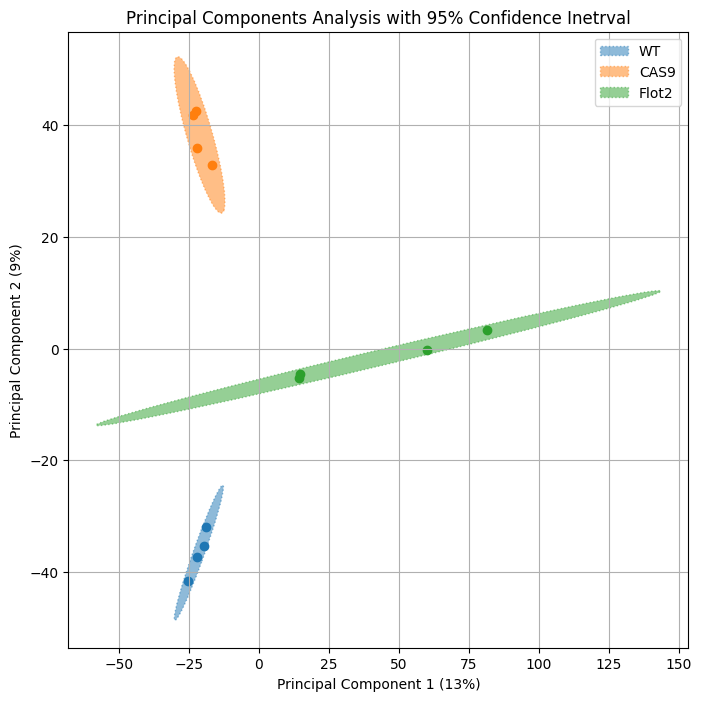

In [52]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(8,8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Inetrval')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_confidence_ellipse.jpg', dpi=300)

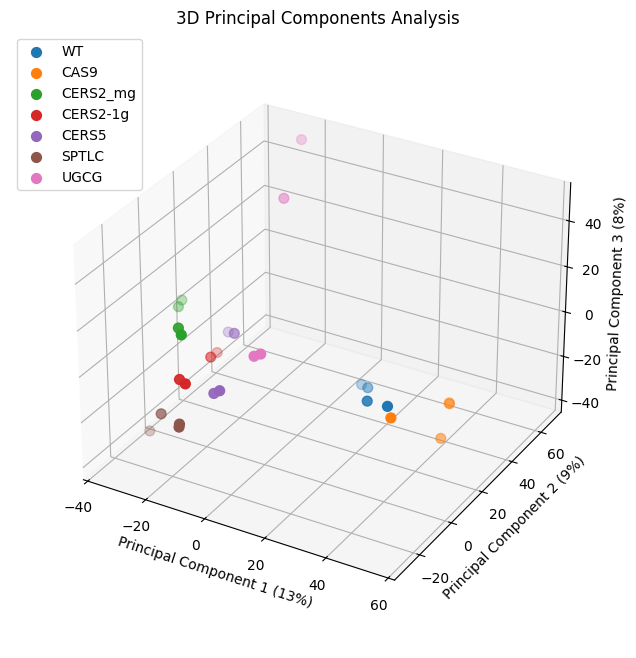

In [20]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['principal component 1']
    y = df_pca[df_pca['Mutation'] == protein]['principal component 2']
    z = df_pca[df_pca['Mutation'] == protein]['principal component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(loc='upper left')
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 (13%)')
ax_nstd.set_ylabel('Principal Component 2 (9%)')
ax_nstd.set_zlabel('Principal Component 3 (8%)')
plt.show()
ax_nstd.figure.savefig('graphs/pos_mode_whole_dataset/pca_3d.jpg', dpi=300)

# Save Chart

In [ ]:
# save chart to html
# pca.save('graphs/pos_mode_whole_dataset/pca-transposed.html')